In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
df = pd.read_csv('data.csv', names=['REs', 'PrNd', 'La', 'Ce', 'Fe', 'Co', 'B', 'TM', 'PrNd_p', 'La_p', 'Ce_p', 'Hcj'])
X = df.iloc[:, :10].values
y = df['Hcj'].values
X_1 = preprocessing.scale(X)
y_1 = preprocessing.scale(y)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

n_range = np.arange(1, 11)
depth_range = np.arange(1, 11)
split = np.arange(2, 11)
n_range_1 = np.linspace(10, 110, 11, dtype=int)
learn = np.linspace(0.01, 0.2, 20)

tuned_parameters_1 = dict(n_estimators=n_range, max_depth=depth_range)
tuned_parameters_2 = dict(max_depth=depth_range, min_samples_split=split)
tuned_parameters_3 = dict(learning_rate=learn, n_estimators=n_range_1)

cv = KFold(n_splits=5, shuffle=True, random_state=50)

rfr = RandomForestRegressor()   
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor(subsample=0.8)
 
clf = GridSearchCV(estimator=gbr, param_grid=tuned_parameters_3, cv=cv, n_jobs=-1)
clf.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f" % (clf.best_params_, clf.best_score_))
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

The best parameters are {'learning_rate': 0.15000000000000002, 'n_estimators': 100} with a score of 0.86

{'learning_rate': 0.15000000000000002, 'n_estimators': 100}

Grid scores on development set:

0.101 (+/-0.057) for {'learning_rate': 0.01, 'n_estimators': 10}
0.202 (+/-0.069) for {'learning_rate': 0.01, 'n_estimators': 20}
0.282 (+/-0.079) for {'learning_rate': 0.01, 'n_estimators': 30}
0.354 (+/-0.087) for {'learning_rate': 0.01, 'n_estimators': 40}
0.416 (+/-0.087) for {'learning_rate': 0.01, 'n_estimators': 50}
0.464 (+/-0.098) for {'learning_rate': 0.01, 'n_estimators': 60}
0.511 (+/-0.094) for {'learning_rate': 0.01, 'n_estimators': 70}
0.547 (+/-0.093) for {'learning_rate': 0.01, 'n_estimators': 80}
0.578 (+/-0.090) for {'learning_rate': 0.01, 'n_estimators': 90}
0.605 (+/-0.091) for {'learning_rate': 0.01, 'n_estimators': 100}
0.629 (+/-0.098) for {'learning_rate': 0.01, 'n_estimators': 110}
0.201 (+/-0.074) for {'learning_rate': 0.02, 'n_estimators': 10}
0.354 (+/-0.103) f

In [72]:
n_range_1 = np.linspace(10, 110, 11, dtype=int)
learn = np.linspace(0.01, 0.2, 20)


array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ])

In [92]:
index = clf.best_index_
train_score =  clf.cv_results_['mean_train_score'][index]
test_score = clf.cv_results_['mean_test_score'][index]
test_socre1 = clf.score(X_test, y_test)
print(train_score)
print(test_score)
print(test_socre1)

0.97313063951
0.855711855323
0.846086762317


In [93]:
def per_err(y_true, y_pred):
    err = np.average(np.abs(y_true - y_pred) / y_true)
    return err

print(per_err(y_train, clf.predict(X_train)))
print(per_err(y_test, clf.predict(X_test)))

0.103072102718
0.234317427796


In [94]:
clf.best_estimator_.feature_importances_

array([ 0.10865916,  0.24295282,  0.03980045,  0.0930608 ,  0.21714717,
        0.05981359,  0.0922338 ,  0.08147721,  0.03116543,  0.03368958])

In [97]:
estimator = clf.best_estimator_
cv = KFold(n_splits=10, shuffle=True)
train_sizes=np.linspace(.1, 1.0, 10)

train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, 
                                                        train_sizes=train_sizes, scoring='r2', n_jobs=-1)

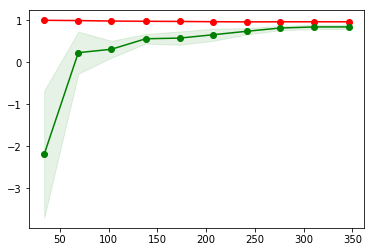

In [98]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

In [99]:
test_scores_mean

array([-2.18785832,  0.22863012,  0.3101679 ,  0.55895383,  0.57556972,
        0.65442066,  0.73828279,  0.81499437,  0.84061979,  0.84089346])